# BANK LOAN ANALYSIS REPORT

## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings


In [2]:
df = pd.read_excel("C:/Users/Zhiyang/Desktop/work/python project/financial_loan.xlsx")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [4]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### Metadata of data

In [5]:
print("No of Rows:", df.shape[0])

No of Rows: 38576


In [6]:
print("No of Columns:", df.shape[1])

No of Columns: 24


In [7]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

### Data types

In [8]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [9]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Total Loan Applications

In [10]:
total_loan_application = df['id'].count()
print("Total Loan Application:", total_loan_application)

Total Loan Application: 38576


### MTD Total Loan Applications

In [15]:
latest_issue_data = df['issue_date'].max()
latest_year = latest_issue_data.year
latest_month = latest_issue_data.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month ==latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications(for {latest_issue_data.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications(for December 2021):4314


### Total Funded Amount

In [22]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/1000000
print("Total Funded Amount: ${:.2f}M". format(total_funded_amount_millions))

Total Funded Amount: $435.76M


### MTD - Total Funded Amount

In [24]:
latest_issue_data = df['issue_date'].max()
latest_year = latest_issue_data.year
latest_month = latest_issue_data.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month ==latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount:${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount:$53.98M


### Total Amount Received

In [25]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_funded_amount/1000000
print("Total Amount Received: ${:.2f}M". format(total_amount_received_millions))

Total Amount Received: $435.76M


### MTD - Total Amount Received

In [26]:
latest_issue_data = df['issue_date'].max()
latest_year = latest_issue_data.year
latest_month = latest_issue_data.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month ==latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print("MTD Total Funded Amount:${:.2f}M".format(mtd_total_amount_received_millions))

MTD Total Funded Amount:$58.07M


### Average Interest rate

In [31]:
average_interest_rate = df['int_rate'].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


### Average Debt-to-Income Ratio (DTI)


In [32]:
average_dti = df['dti'].mean()*100
print("Average DTI: {:.2f}%".format(average_dti))

Average DTI: 13.33%


### Good Loan Metrics

In [33]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])] #good loans

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_received_millions = good_loan_received / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print(f"Good Loan Funded Amount (in Millions): ${good_loan_funded_amount_millions:.2f}M")
print(f"Good Loan Total Received (in Millions): ${good_loan_received_millions:.2f}M")
print(f"Percentage of Good Loan Applications: {good_loan_percentage:.2f}%")


Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [35]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])] #bad loans

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_received_millions = bad_loan_received / 1_000_000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print(f"Bad Loan Funded Amount (in Millions): ${bad_loan_funded_amount_millions:.2f}M")
print(f"Bad Loan Total Received (in Millions): ${bad_loan_received_millions:.2f}M")
print(f"Percentage of Bad Loan Applications: {bad_loan_percentage:.2f}%")

Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

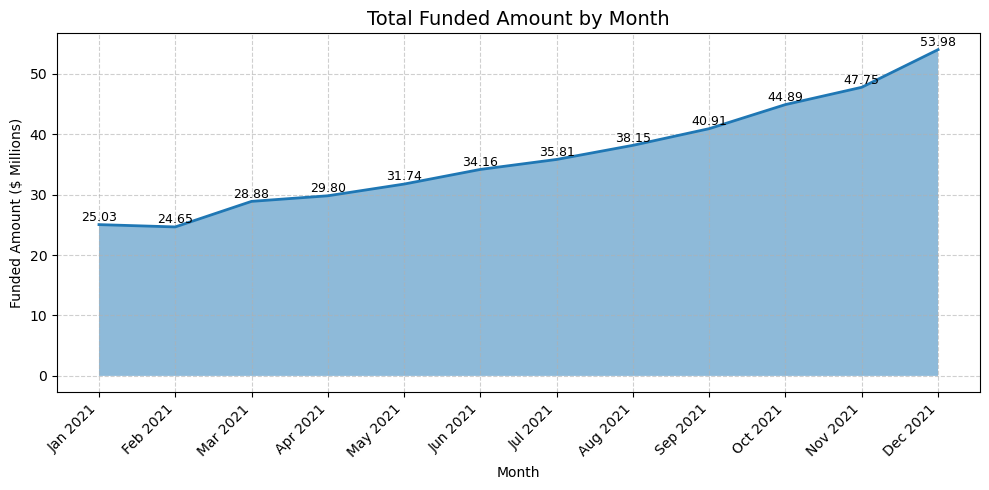

In [36]:
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')

monthly_funded = (
    df.dropna(subset=['issue_date'])
      .sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

x = np.arange(len(monthly_funded))
y = monthly_funded['loan_amount_millions'].values
labels = monthly_funded['month_name'].values

plt.figure(figsize=(10, 5))
plt.fill_between(x, y, alpha=0.5)
plt.plot(x, y, linewidth=2)

for i, val in enumerate(y):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(x, labels, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Amount Received


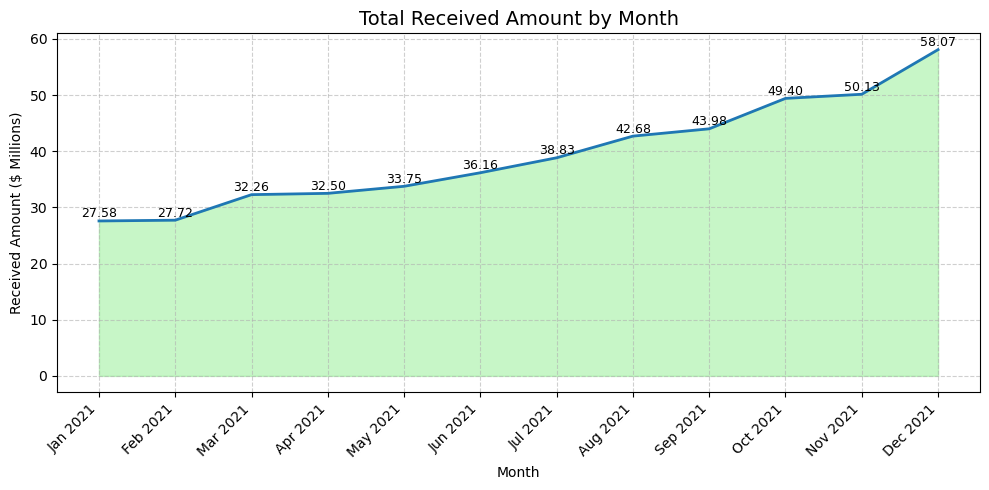

In [38]:
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df2 = df.dropna(subset=['issue_date'])

monthly_received = (
    df2.assign(month=df2['issue_date'].dt.to_period('M'))
       .groupby('month', sort=True)['total_payment']
       .sum()
       .div(1_000_000)
       .reset_index(name='received_amount_millions')
)

monthly_received['month_name'] = monthly_received['month'].dt.strftime('%b %Y')

x = np.arange(len(monthly_received))
y = monthly_received['received_amount_millions'].values
labels = monthly_received['month_name'].values

plt.figure(figsize=(10, 5))
plt.fill_between(x, y, color='lightgreen', alpha=0.5)
plt.plot(x, y, linewidth=2)

for i, val in enumerate(y):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks(x, labels, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Loan Applications


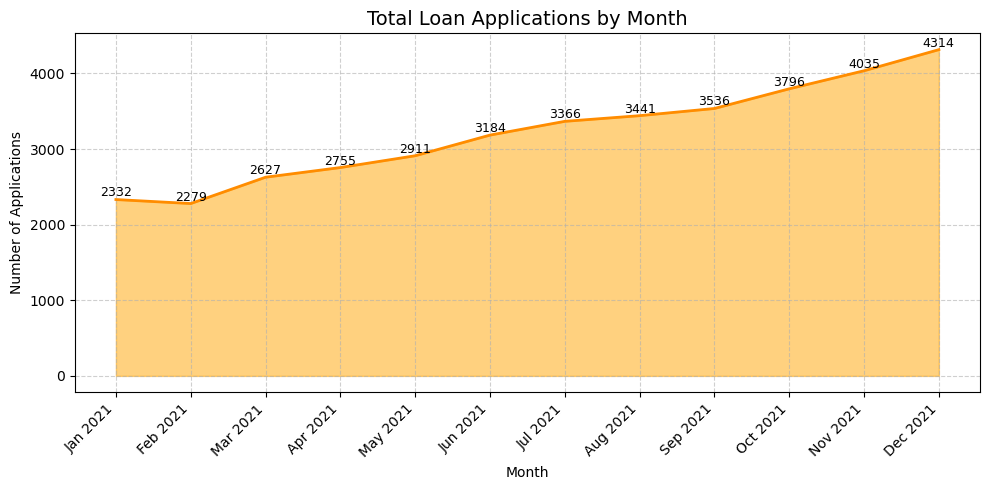

In [39]:
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df2 = df.dropna(subset=['issue_date'])


monthly_applications = (
    df2.assign(month=df2['issue_date'].dt.to_period('M'))
       .groupby('month', sort=True)['id']
       .count()
       .reset_index(name='loan_applications_count')
)


monthly_applications['month_name'] = monthly_applications['month'].dt.strftime('%b %Y')


x = np.arange(len(monthly_applications))
y = monthly_applications['loan_applications_count'].values
labels = monthly_applications['month_name'].values

plt.figure(figsize=(10, 5))
plt.fill_between(x, y, color='orange', alpha=0.5)   
plt.plot(x, y, color='darkorange', linewidth=2)            


for i, val in enumerate(y):
    plt.text(i, val + 0.5, f"{val}", ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')

plt.xticks(x, labels, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Funded Amount 

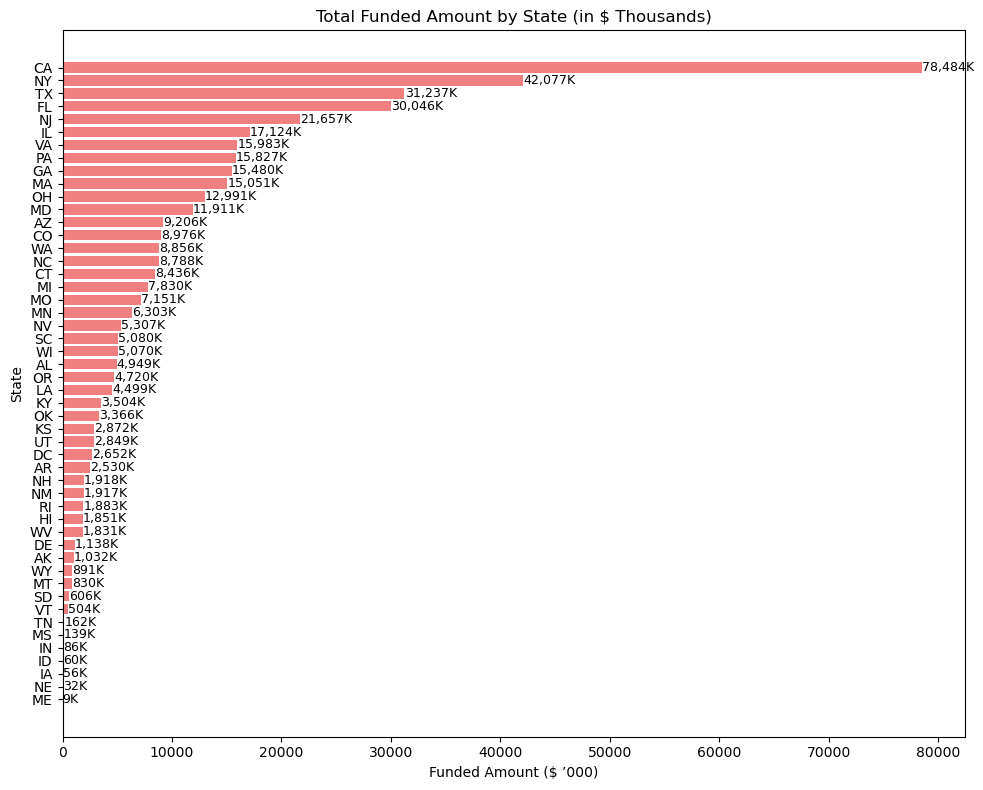

In [53]:
state_funding = (
    df.groupby('address_state')['loan_amount']
      .sum()
      .sort_values(ascending=True)
)

# for top 20
#state_funding = state_funding.tail(20)

# conver to K
state_funding_thousands = state_funding / 1000

# draw
plt.figure(figsize=(10, 8))
bars = plt.barh(
    state_funding_thousands.index,
    state_funding_thousands.values,
    color='lightcoral'
)

# 4) mark value
for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 10, y, f"{width:,.0f}K", va='center', fontsize=9)

plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('Funded Amount ($ \u2019000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

### Loan Term Analysis by Total Funded Amount

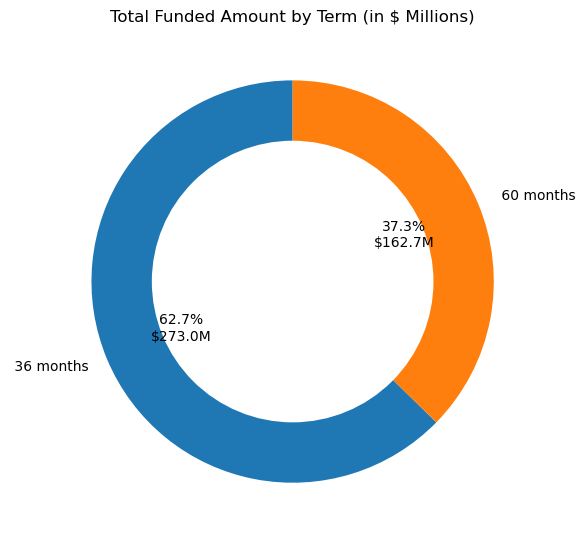

In [52]:
term_funding_millions = (
    df.groupby('term')['loan_amount']
      .sum()
      .div(1_000_000)
      .sort_values(ascending=False)
)

total_m = term_funding_millions.sum()

# 2) draw
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    term_funding_millions.values,
    labels=term_funding_millions.index,
    startangle=90,
    autopct=lambda p: f"{p:.1f}%\n${(p/100)*total_m:.1f}M",
    wedgeprops={'width': 0.4},   # width of dount
    textprops={'fontsize': 10}
)

# center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Total Funded Amount by Term (in $ Millions)")
plt.tight_layout()
plt.show()

### Employee Length by Total Funded Amount

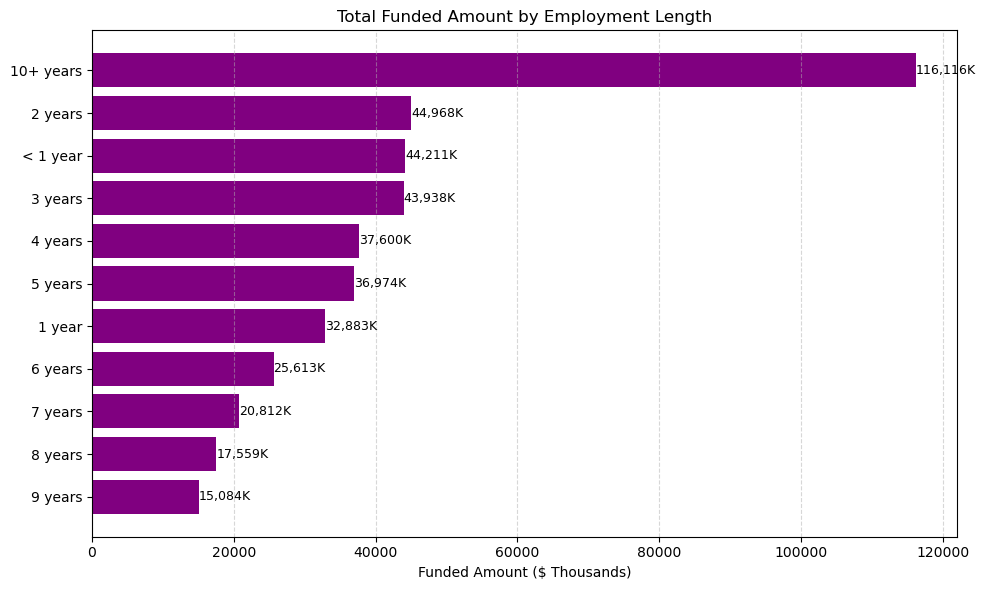

In [51]:
# 1) in Thousands
emp_funding_thousands = (
    df.groupby('emp_length')['loan_amount']
      .sum()
      .sort_values(ascending=True)
      .div(1_000)
)


plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands.values, color='purple')


for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 5, y, f"{width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Funded Amount ($ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose by Total Funded Amount

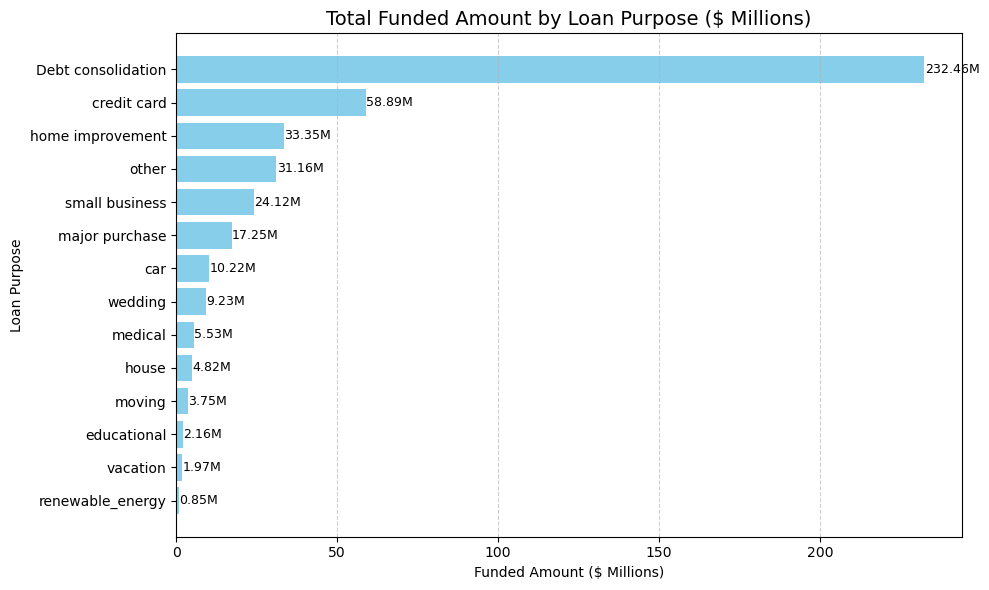

In [50]:
# 1) Millions
purpose_funding_millions = (
    df.groupby('purpose')['loan_amount']
      .sum()
      .sort_values(ascending=True)
      .div(1_000_000)
)


plt.figure(figsize=(10, 6))
bars = plt.barh(
    purpose_funding_millions.index,
    purpose_funding_millions.values,
    color='skyblue'
)

for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 0.1, y, f"{width:.2f}M", va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Home Ownership by Total Funded Amount

In [49]:
home_funding = (
    df.groupby('home_ownership', dropna=False)['loan_amount']
      .sum()
      .reset_index()
)

#  Millions
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000


# treemap
fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership ($ Millions)'
)

fig.show()